<h1>Project DSCI 100-group-17</h1>
 Minecraft Data Analysis

## Introduction
A research group at ubc is conducting a research on how people play video games. They are provididng free servers to players for this project and record their actions in minecraft world. Allocating servers for players to play minecraft is hard: they must focus their recruitment efforts and ensure that they have sufficient resources (such as server hardware and software licensing) to manage the volume of players they draw in. 

The Computer Science department at UBC has given us 2 files containing data on the players who use their server to play Minecraft.

**Question we are answering**
What kind of players are most likely to contribute a large amount of data? 

**Following 2 files are provided to us** 

The first file is **players.csv** containg info on each player.
The columns in this dataset are:

- `experience <fct>` - It's a categorical column indicating the level of player
- `subscribe <lgl>` - Whether user subscribed for promotion emails (`true`) or not (`false`) 
- `hashedEmail <chr>` - A unique Id for each player
- `played_hours <dbl>` - tells how many hours the player has played the game
- `name <chr>` - Game name choosen by each player
- `gender <fct>` - gender of the player
- `age <int>` - age of the player
- `individualId` - ***empty column***
- `organizationName` - ***empty column***

The second file is **sessionss.csv** containg info on each session on the server.
The columns in the **sessions.csv** dataset are:

- `hashedEmail <chr>` - A unique Id for each player
- `start_time <dttm>` - The time when each session has started with date and time
- `end_time <dttm>` - The time when each session has ended with date and time
- `original_start_time <dbl>` - Unix time for the start of the session
- `original_end_time <dbl>` - Unix time for the end of the session

The **Players dataset** have 196 observations, **Sessions Dataset** have 1535 observations


**Datasets we are using**

We are using both data sets to make a regression model to predict played_hours. 

The explanotary variables we will be using are :

- `age <int>` - age of the player

 **We will be converting experience into numerical value to make it work as an exploratory variable**
 
- `experience <dbl>` - It will be a quantitative variable describing the experience of a player

 **We will be using sessions.csv file to get the number of sessions each user played and then we will merge both datasets and will get rid of unwanted variable**
 
- `number_of_sessions <int>` - This variable will tell us how many sessions each player logged in.

## Methods and Results

### Methods


In [1]:
library(dplyr)
library(tidyverse)
library(tidymodels)
library(tidyr)
library(repr)
library(readr)
library(rvest)
library(ggplot2)
library(hms)
library(lubridate)
set.seed(1234)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yards

In [2]:
url <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
players_data <- read_csv(url) #load in the two datasets

players_data_df <- as.data.frame(players_data) #convert to a dataframe in order to wrangle
# players_data_df

url <- "https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"
session_data <- read_csv(url)

session_data_df <- as.data.frame(session_data) 
# session_data_df

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
#joining both datasets by hashedemail

merged_df <- left_join(players_data_df, session_data_df, by = "hashedEmail")|>
select(-individualId, -organizationName, -original_start_time, - original_end_time, -start_time, -end_time) |> 
filter(played_hours > 0)


sessions_number <- merged_df |>
group_by(name) |>
  summarise(number_of_sessions = n()) 

merged_df <- merged_df |>
  left_join(sessions_number, by = "name")

merged_df <- merged_df |>
  mutate(experience_numeric = case_when(
    experience == "Beginner" ~ 1,
    experience == "Amateur" ~ 2,
    experience == "Regular" ~ 3,
    experience == "Pro" ~ 4,
    experience == "Veteran" ~ 5))

merged_exp <- merged_df |>
  distinct(name, .keep_all=TRUE)

#remove columns from dataset we dont need anymore. 
#hashed email and name are unique for each 
#indidivudal so we dont need both present, 
#and we dont need the old experience column

merged_final <- merged_exp |>
    select(-experience, -hashedEmail)

# merged_final

List of 1
 $ legend.position: chr "none"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


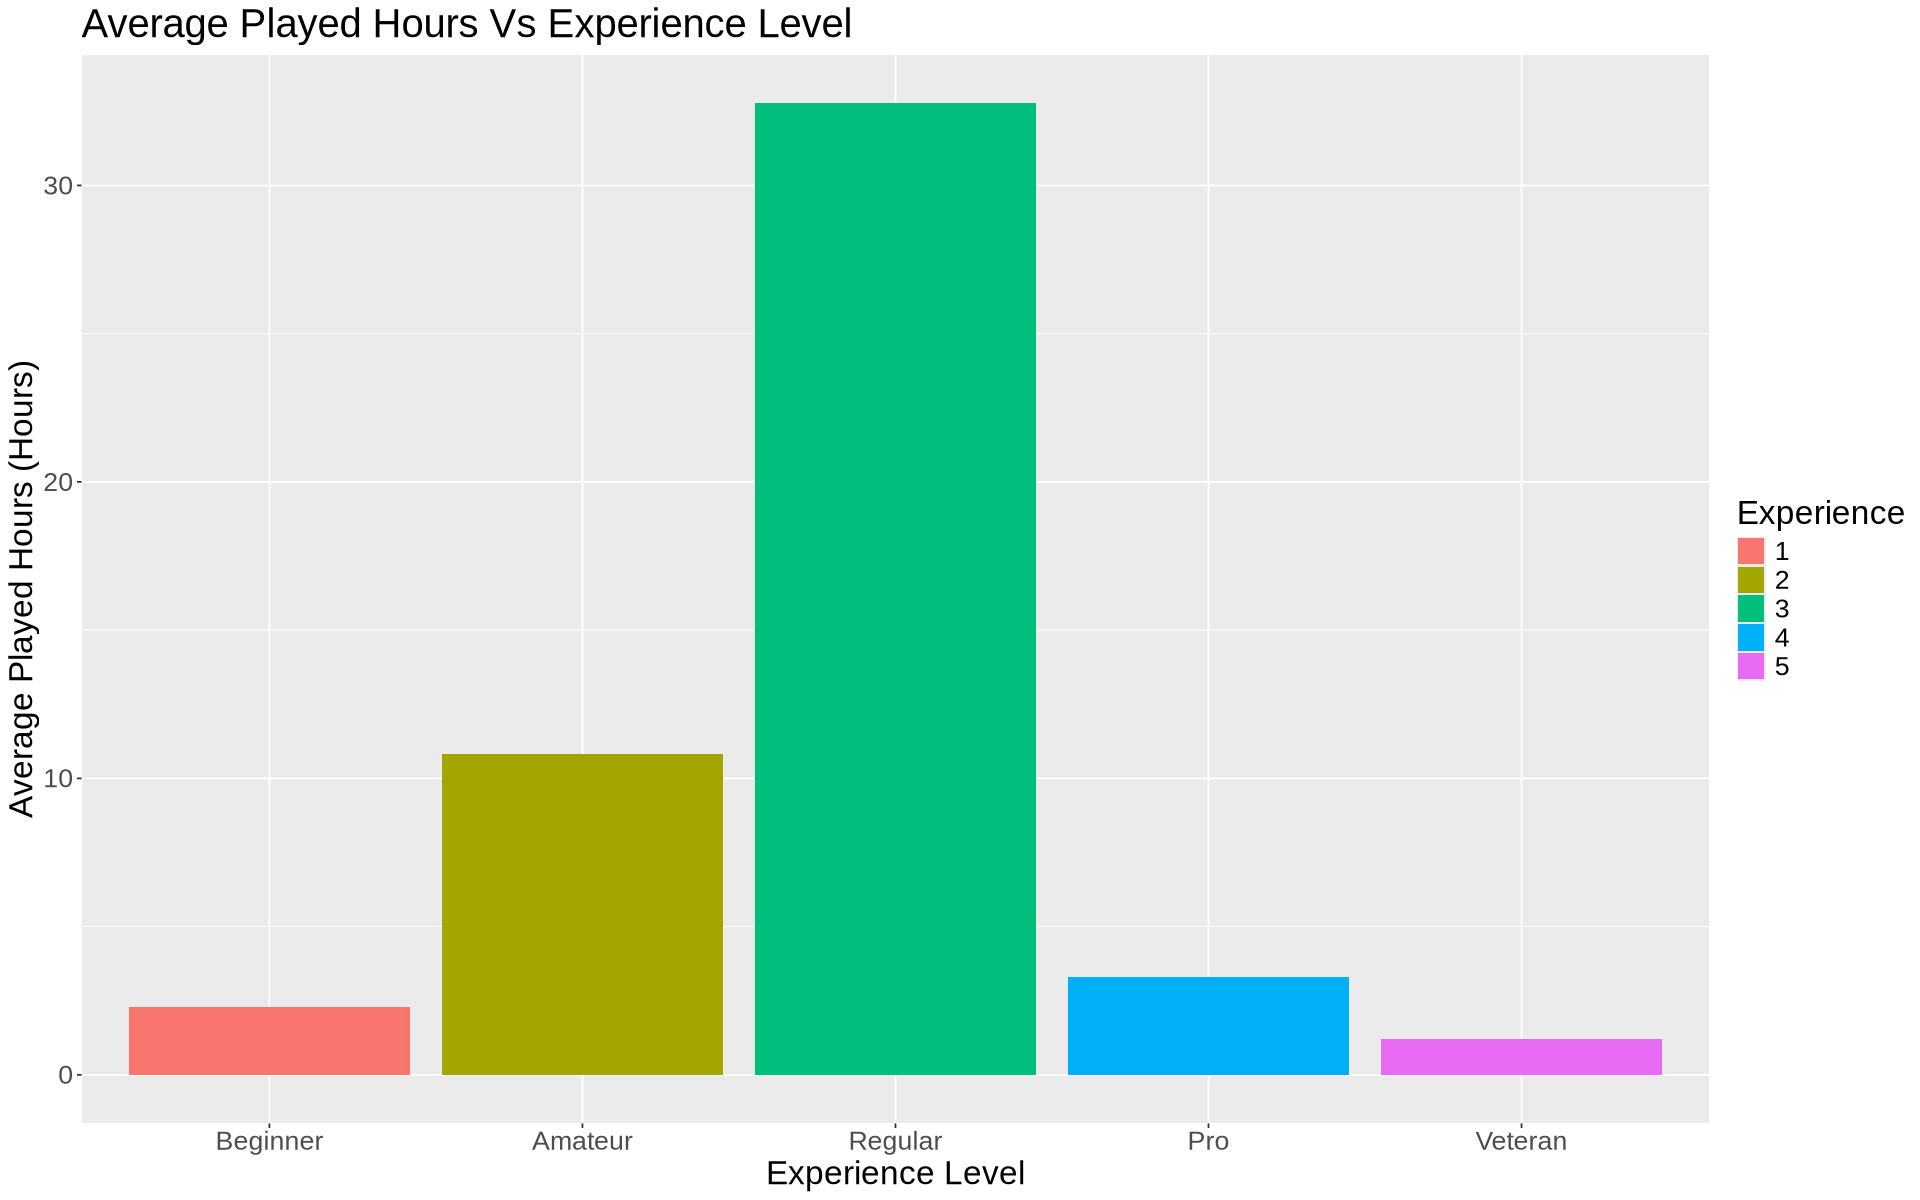

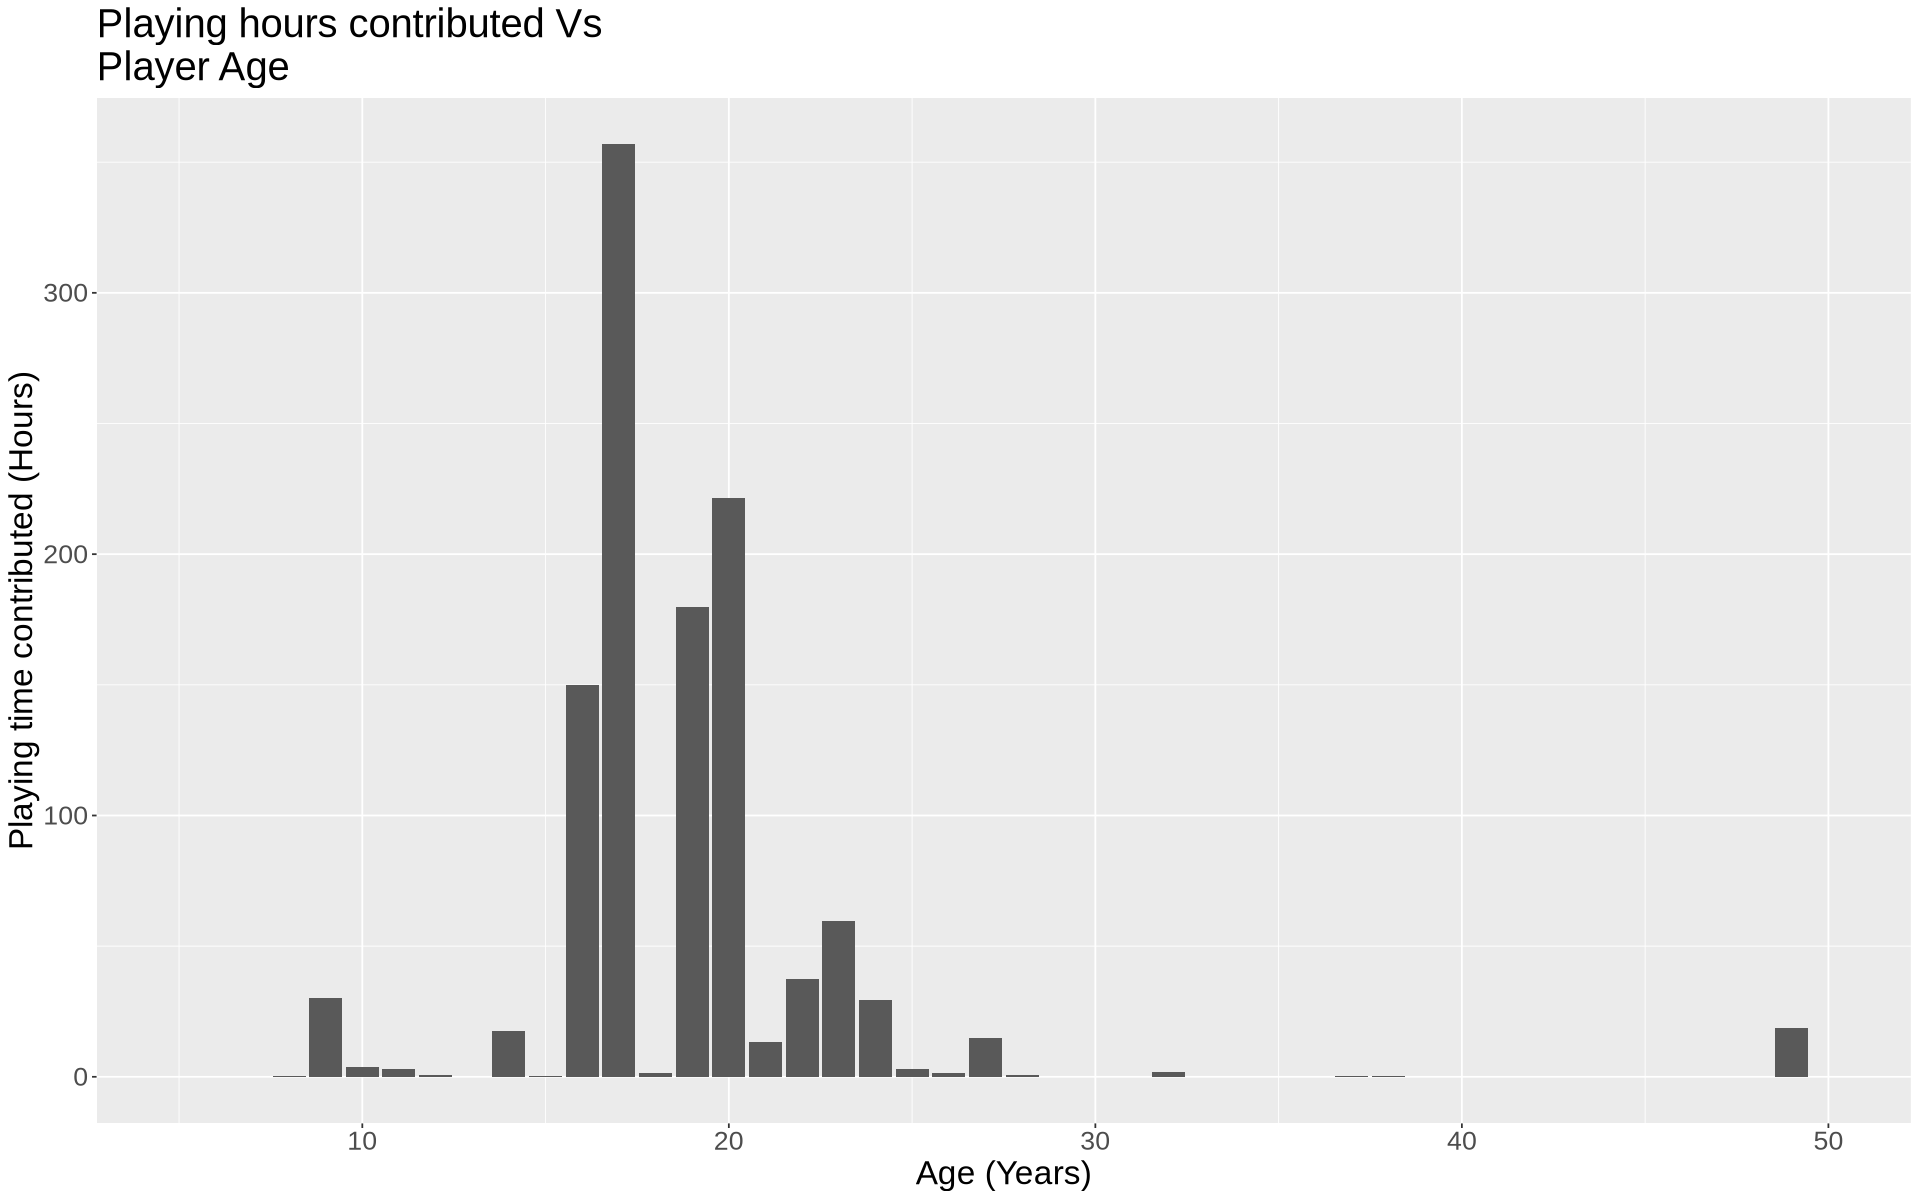

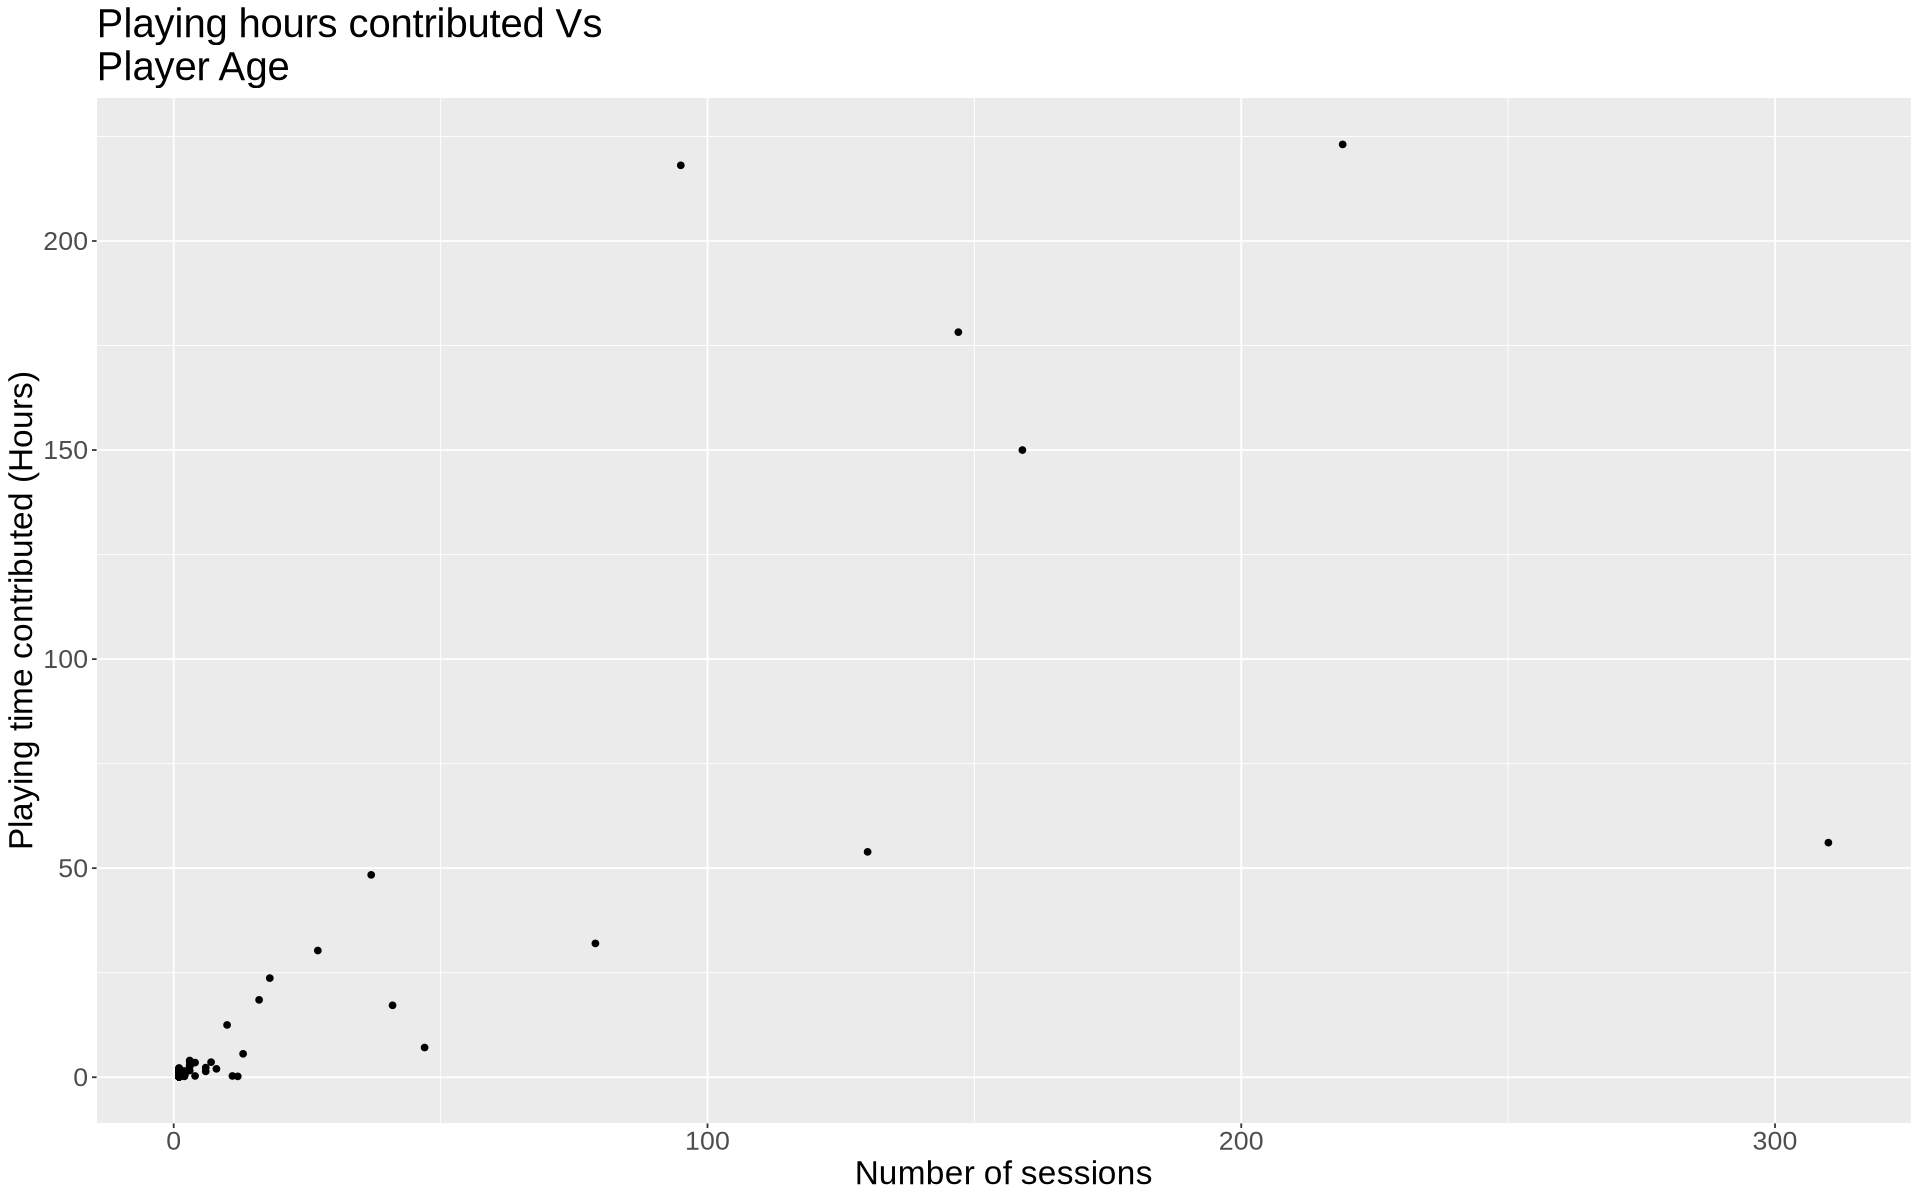

In [9]:
# options(repr.plot.width = 16, repr.plot.height = 10) 

#  average played_hours by experience level
avg_played_hours <- merged_final |>
  group_by(experience_numeric) |> 
  summarise(avg_played_hours = mean(played_hours, na.rm = TRUE), .groups = "drop")

# Bar plot to visualize average played hours by experience level
ggplot(avg_played_hours, aes(x = as.factor(experience_numeric), y = avg_played_hours, fill = as.factor(experience_numeric))) +
  geom_bar(stat = "identity") +
  labs(title = "Average Played Hours Vs Experience Level",
       x = "Experience Level",
       y = "Average Played Hours (Hours)",
      fill = "Experience") +
      scale_x_discrete(labels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran")) +
    theme(text = element_text(size = 20))
    theme(legend.position = "none")



 #avg age by hours      
avg_played_hours_by_age <- merged_final |>
  group_by(age) |>
  summarise(avg_played_hours = mean(played_hours, na.rm = TRUE))

# Bar plot: Played Hours by Age
ggplot(merged_final, aes(x = age, y = played_hours)) +
  geom_bar(stat = "identity") +
  labs(x = "Age (Years)",
    y = "Playing time contributed (Hours)",
    title = "Playing hours contributed Vs\nPlayer Age") +
    theme(text = element_text(size = 20)) +
     theme(legend.position = "none") +
    xlim(5,50)

# Bar plot: Played Hours by Sessions
ggplot(merged_final, aes(x = number_of_sessions, y = played_hours)) +
  geom_point() +
  labs(x = "Number of sessions",
    y = "Playing time contributed (Hours)",
    title = "Playing hours contributed Vs\nnumber of sessions") +
    theme(text = element_text(size = 20)) +
     theme(legend.position = "none")

options(repr.plot.width = 16, repr.plot.height = 10) 

#  average played_hours by experience level
avg_played_hours <- merged_final |>
  group_by(experience_numeric) |> 
  summarise(avg_played_hours = mean(played_hours, na.rm = TRUE), .groups = "drop")

# Bar plot to visualize average played hours by experience level

# ggplot(merged_final, aes(x = experience_numeric, y = played_hours, fill = gender)) +
#   geom_bar(stat = "identity") +
#   labs(title = "Total Played Hours Vs Experience Level",
#        x = "Experience Level",
#        y = "Total Played Hours") +
#       scale_x_discrete(labels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran")) +
#     theme(text = element_text(size = 20))
#     theme(legend.position = "none")


# #  #avg age by hours      
# # avg_played_hours_by_age <- merged_final |>
# #   group_by(age) |>
# #   summarise(avg_played_hours = mean(played_hours, na.rm = TRUE))

# # Bar plot: Total Hours played by Age
# ggplot(merged_final, aes(x = age, y = played_hours, fill = gender)) +
#   geom_bar(stat = "identity") +
#   labs(x = "Age (Years)",
#     y = "Total Played Hours",
#     title = "Total Played Hours Vs Age") +
#     theme(text = element_text(size = 20)) +
#      theme(legend.position = "none") +
#     xlim(5,50)

# # Bar plot: Total Hours played by number of sessions
# ggplot(merged_final, aes(x = number_of_sessions, y = played_hours, fill = gender)) +
#   geom_bar(stat = "identity") +
#   labs(title = "Total Played Hours Vs Number of sessions",
#        x = "Number of Sessions",
#        y = "Total Played Hours")
#     theme(text = element_text(size = 20))
#     theme(legend.position = "none")    

In [ ]:
merged_final <- ungroup(merged_final)

merged_final_no_outliers <- merged_final |>
                            filter(age < 80, age > 5, number_of_sessions < 250)
# merged_final_no_outliers
merged_final_age_split <- initial_split(merged_final_no_outliers, prop = .75, strata = age)
hours_age_training <- training(merged_final_age_split)
hours_age_testing <- testing(merged_final_age_split)



hours_experience_split <- initial_split(merged_final, prop = .75, strata = experience_numeric)
hours_experience_training <- training(hours_experience_split)
hours_experience_testing <- testing(hours_experience_split)



hours_sessions_split <- initial_split(merged_final, prop = .75, strata = number_of_sessions)
hours_sessions_training <- training(hours_sessions_split)
hours_sessions_testing <- testing(hours_sessions_split)

In [ ]:


gridvals <- tibble(neighbors = seq(from = 1, to = 59, by = 1))

tune_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
      set_engine("kknn") |>
      set_mode("regression") 

# Tuning the model for predicting played_hours from age to find best k
hours_age_vfold <- vfold_cv(hours_age_training,v = 5, strata = age)

hours_age_recipe <- recipe(played_hours ~ age, data = hours_age_training) |>
      step_scale(all_predictors()) |>
      step_center(all_predictors())

hours_age_workflow <- workflow() |>
                    add_recipe(hours_age_recipe) |>
                    add_model(tune_spec)

hours_age_results <- hours_age_workflow |>
                    tune_grid(resamples = hours_age_vfold, grid = gridvals) |>
                    collect_metrics()

hours_age_min <- hours_age_results |>
   filter(.metric == "rmse") |>
   slice_min(mean,n= 1)

hours_age_min

In [ ]:

# Tuning the model for predicting played_hours from experience to find best k

hours_experience_vfold <- vfold_cv(hours_experience_training,v = 5, strata = age)

gridvals <- tibble(neighbors = seq(from = 1, to = 59, by = 1))

hours_experience_recipe <- recipe(played_hours ~ experience_numeric, data = hours_experience_training) |>
      step_scale(all_predictors()) |>
      step_center(all_predictors())

hours_experience_workflow <- workflow() |>
                    add_recipe(hours_experience_recipe) |>
                    add_model(tune_spec)

hours_experience_results <- hours_age_workflow |>
                    tune_grid(resamples = hours_experience_vfold, grid = gridvals) |>
                    collect_metrics()

hours_experience_min <- hours_experience_results |>
   filter(.metric == "rmse") |>
   slice_min(mean,n= 1)

hours_experience_min

In [ ]:
# Tuning the model for predicting played_hours from number_of_sessions to find best k

hours_session_vfold <- vfold_cv(hours_sessions_training, v = 5, strata = number_of_sessions)

gridvals <- tibble(neighbors = seq(from = 1, to = 60, by = 1))

tune_spec_2 <- linear_reg() |> 
      set_engine("lm") |>
      set_mode("regression")

hours_sessions_recipe <- recipe(played_hours ~ number_of_sessions, data = hours_sessions_training) |>
                        step_scale(number_of_sessions) |>
                        step_center(number_of_sessions)

hours_sessions_workflow <- workflow() |>
                        add_recipe(hours_sessions_recipe) |>
                        add_model(tune_spec_2)

hours_sessions_result <- hours_sessions_workflow |>
                        tune_grid(resamples = hours_session_vfold, grid = gridvals) |>
                        collect_metrics()

hours_sessions_min <- hours_sessions_result |>
                        filter(.metric == "rmse") |>
                        slice_min(mean,n =1)
hours_sessions_min

In [ ]:
k_min_age <- hours_age_min |>
         pull(neighbors)

hours_age_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min_age) |>
         set_engine("kknn") |>
         set_mode("regression")

hours_age_best_fit <- workflow() |>
         add_recipe(hours_age_recipe) |>
         add_model(hours_age_best_spec) |>
         fit(data = hours_age_training)

hours_age_summary <- hours_age_best_fit |>
          predict(hours_age_testing) |>
          bind_cols(hours_age_testing) |>
          metrics(truth = played_hours, estimate = .pred)

hours_age_summary

In [ ]:
k_min_experience <- hours_experience_min |>
         pull(neighbors)

hours_experience_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min_experience) |>
         set_engine("kknn") |>
         set_mode("regression")

hours_experience_best_fit <- workflow() |>
         add_recipe(hours_experience_recipe) |>
         add_model(hours_experience_best_spec) |>
         fit(data = hours_experience_training)

hours_experience_summary <- hours_experience_best_fit |>
          predict(hours_experience_testing) |>
          bind_cols(hours_experience_testing) |>
          metrics(truth = played_hours, estimate = .pred)

hours_experience_summary

In [ ]:
# k_min_sessions <- hours_sessions_min |> pull(neighbors)

hours_sessions_best_spec <- linear_reg() |>
                            set_engine("lm") |>
                            set_mode("regression")

hours_sessions_best_fit <- workflow() |>
                            add_recipe(hours_sessions_recipe) |>
                            add_model(hours_sessions_best_spec) |>
                            fit(hours_sessions_training)

hours_sessions_fit_summary <- hours_sessions_best_fit |>
                                predict(hours_sessions_testing) |>
                                bind_cols(hours_sessions_testing) |>
                                metrics(truth = played_hours, estimate = .pred)
hours_sessions_fit_summary

In [ ]:

hours_age_predicted_data <- hours_age_best_fit |>
          predict(hours_age_testing) |>
          bind_cols(hours_age_testing)


hours_age_plot <- merged_final |> 
                    ggplot(aes(x = age, y = played_hours, alpha = 0.5)) +
                    geom_bar(stat = "identity") +  
                    geom_line(data = hours_age_predicted_data,aes(x = age, y = .pred), color = "blue") +
                    xlim(c(0, 50))+
                    labs( x = "Age (years)", y = "Played hours (Hours)",
                         title = "Played hours\nPredicted played hours") +
                    theme(text = element_text(size = 20))

  
hours_age_plot

In [ ]:
hours_experience_predicted_data <- hours_experience_best_fit |>
          predict(hours_experience_testing) |>
          bind_cols(hours_experience_testing)


hours_age_plot <- merged_final |> 
                    ggplot(aes(x = experience_numeric, y = played_hours, alpha = 0.3)) +
                    geom_bar(stat = "identity") + 
                    labs( x = "Experience", y = "Played hours (Hours)",
                         title = "Played hours\nPredicted played hours", fill = "Experience")+
                    geom_line(data = hours_experience_predicted_data, aes(x = experience_numeric, y = .pred), color = "blue")+
                    theme(text = element_text(size = 20))

  
hours_age_plot

In [ ]:
hours_sessions_predicted_data <- hours_sessions_best_fit |>
          predict(hours_sessions_testing) |>
          bind_cols(hours_sessions_testing)


hours_sessions_plot <- merged_final |> 
                    ggplot(aes(x = number_of_sessions, y = played_hours)) +
                    geom_point() +  
                    geom_line(data = hours_sessions_predicted_data, aes(x = number_of_sessions, y = .pred), color = "blue") +
                    labs( x = "Number of sessions", y = "Played Hours (Hours)", title= "Played hours\nPredicted played hours") +
                    theme(text = element_text(size = 20))
  
hours_sessions_plot